In [6]:
# Import TensorFlow library for deep learning operations
import tensorflow as tf

# Import MNIST dataset for digit recognition
from tensorflow.keras.datasets import mnist

# Import utility for one-hot encoding labels
from tensorflow.keras.utils import to_categorical

# Import image data generator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import NumPy for numerical operations
import numpy as np

# Load the MNIST dataset into training and test sets
(training_X, training_y), (test_X, test_y) = mnist.load_data()


In [7]:
# Reshape training and test sets to add a channel dimension
training_X = training_X.reshape(training_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
training_y = to_categorical(training_y)
test_y = to_categorical(test_y)

# Normalize pixel values to range [0, 1]
training_X = training_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255


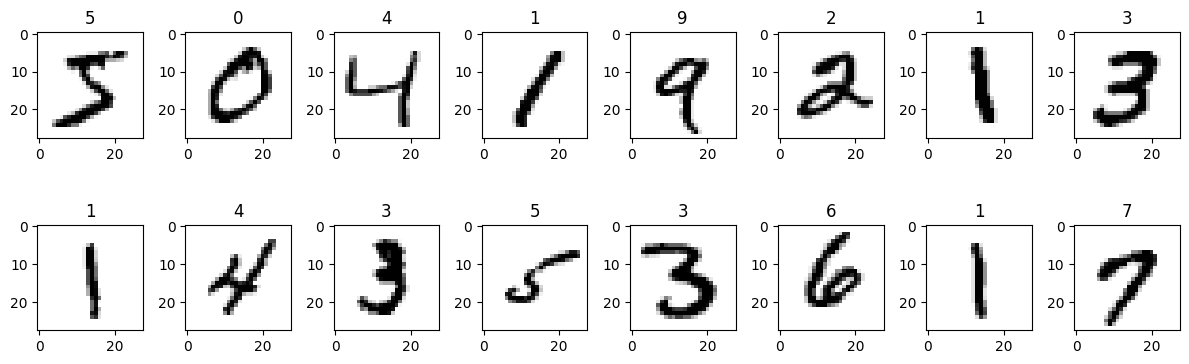

In [8]:
# Define the number of rows and columns for subplot arrangement
rows = 2
columns = 8
num = rows * columns

# Select a subset of images and labels for visualization
images = training_X[0:num]
labels = training_y[0:num]

# Create a figure and axes for subplots
fig, axes = plt.subplots(rows, columns, figsize=(1.5 * columns, 2 * rows))

# Plot each image with its corresponding label
for i in range(num):
    ax = axes[i // columns, i % columns]
    ax.imshow(images[i].reshape(28, 28), cmap='gray_r')
    label = np.argmax(labels[i])
    ax.set_title(f'{label}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [9]:
# Apply various transformations to augment the training data for better generalization
# The transformations include rotation, width and height shift, shear, and zoom
gendata = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5, 1.5]
)

# Fit the image data generator on the training set
gendata.fit(training_X)

BEFORE:



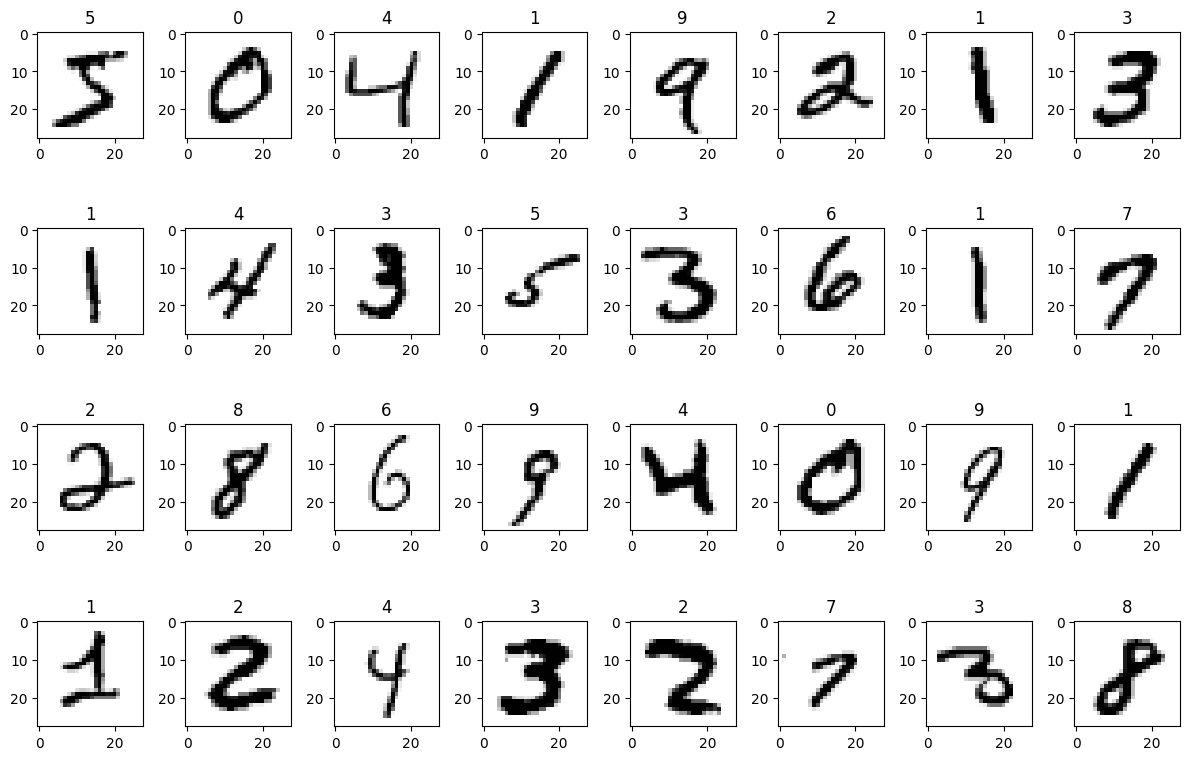

AFTER:



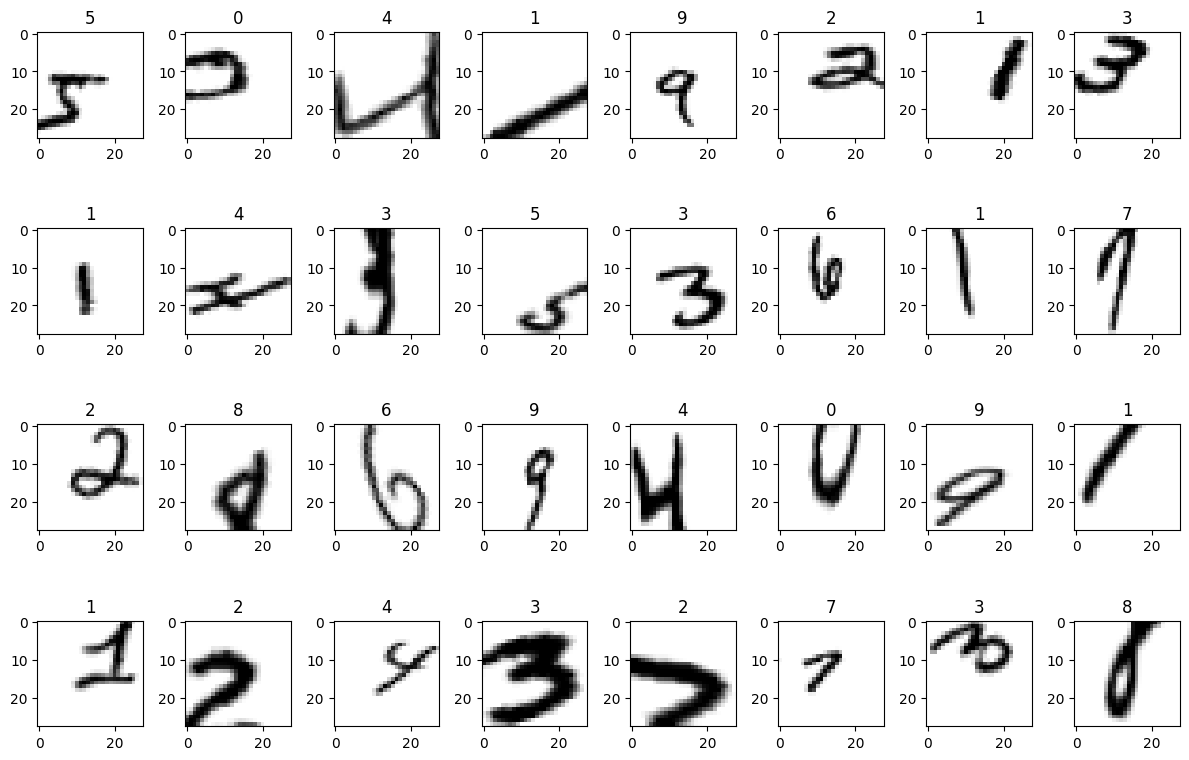

In [10]:
# Define the number of rows and columns for subplot arrangement
rows = 4
columns = 8
num = rows * columns

# Display original images before augmentation
print('BEFORE:\n')
fig1, axes1 = plt.subplots(rows, columns, figsize=(1.5 * columns, 2 * rows))
for i in range(num):
    ax = axes1[i // columns, i % columns]
    ax.imshow(training_X[i].reshape(28, 28), cmap='gray_r')
    label = np.argmax(training_y[i])
    ax.set_title(f'{label}')
plt.tight_layout()
plt.show()

# Display augmented images after applying transformations
print('AFTER:\n')
fig2, axes2 = plt.subplots(rows, columns, figsize=(1.5 * columns, 2 * rows))
for X, y in gendata.flow(training_X, training_y.reshape(training_y.shape[0], 10), batch_size=num, shuffle=False):
    for i in range(0, num):
        ax = axes2[i // columns, i % columns]
        ax.imshow(X[i].reshape(28, 28), cmap='gray_r')
        label = int(np.argmax(y[i]))
        ax.set_title(f'{label}')
    break
plt.tight_layout()
plt.show()
